Importing modules

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from Layer import *
from network import Network
from activation_func import tanh, tanh_prime, sigmoid, sigmoid_prime, softmax, softmax_prime, relu, relu_prime
from loss_func import mse, mse_prime, cross_entropy, cross_entropy_prime
from data_func import vectorize_labels, k_fold, import_data
from performance_func import plot_confusion_matrix, plot_error

Importing data

In [2]:
# import data and initialize seed
np.random.seed(10)
training_size = 60000
normalize = True
training, labels, test, original_test_labels, test_labels = import_data(size=training_size, normalize=normalize)

# specify input and output parameters
features = 784
output_classes = 10

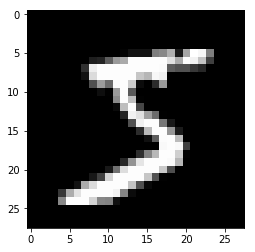

In [10]:
plt.imshow(training[0].reshape(28,28), cmap='gray')

Setting configuration

In [3]:
# hyper parameters
learning_rate = 5e-3
hidden_layers = [30]
max_epochs = 10
batch_size = 32
weight_decay = 0.01
momentum = True



Train the network

In [4]:
%%time
# set up the network with specified layers, loss, and activation
net = Network()
net.setup_net(hidden_layers, features, output_classes,
              activation=relu, activation_prime=relu_prime,
              loss_activation=softmax, loss_activation_prime=softmax_prime,
              loss=cross_entropy, loss_prime=cross_entropy_prime)
# prepare data for training
fold_train_data, fold_train_labels, fold_val_data, fold_val_labels = k_fold(training, labels, k=5, n=5)

# train the model on training data and labels using specific hyper-parameters
errors, val_errors, val_accs = net.fit(fold_train_data, fold_train_labels, fold_val_data, fold_val_labels,
                             max_epochs, learning_rate, batch_size, momentum, weight_decay)

# print the accuracy
print("The test accuracy of the network is: {}".format(
      net.accuracy(x=test, y_true=original_test_labels)))

epoch 1/10   training error=0.592348  validation error=0.312593 validation accuracy=0.906250 ETA=0:01:51 tpe=12.349330
epoch 2/10   training error=0.301460  validation error=0.250713 validation accuracy=0.924417 ETA=0:01:39 tpe=0.049190
epoch 3/10   training error=0.248177  validation error=0.219099 validation accuracy=0.936000 ETA=0:01:27 tpe=0.006050
epoch 4/10   training error=0.218631  validation error=0.201214 validation accuracy=0.940000 ETA=0:01:15 tpe=0.054126
epoch 5/10   training error=0.197007  validation error=0.191198 validation accuracy=0.943917 ETA=0:01:03 tpe=0.066172
epoch 6/10   training error=0.182368  validation error=0.177637 validation accuracy=0.948167 ETA=0:00:50 tpe=-0.013271
epoch 7/10   training error=0.168573  validation error=0.168357 validation accuracy=0.951250 ETA=0:00:38 tpe=0.099976
epoch 8/10   training error=0.159871  validation error=0.161750 validation accuracy=0.951667 ETA=0:00:25 tpe=-0.016113
epoch 9/10   training error=0.151291  validation erro

TypeError: accuracy() got an unexpected keyword argument 'errors'

loss: 6.367268318111211, true: 8, predicted: 7


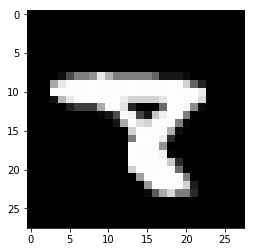

loss: 6.4201640858874205, true: 8, predicted: 4


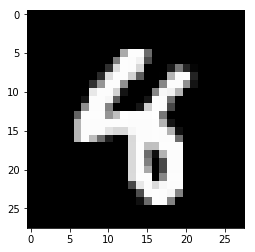

loss: 6.988013828171138, true: 9, predicted: 0


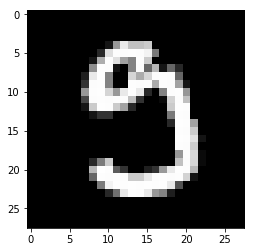

loss: 7.108420759179819, true: 2, predicted: 7


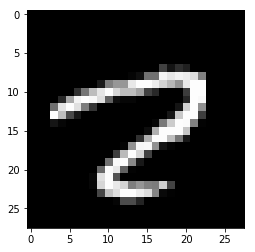

loss: 7.220944155288779, true: 1, predicted: 5


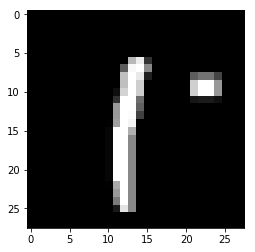

loss: 7.229600116291275, true: 0, predicted: 7


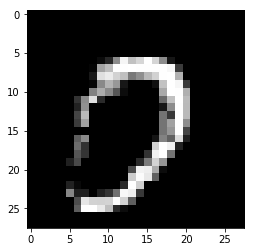

loss: 7.3521171343282505, true: 9, predicted: 6


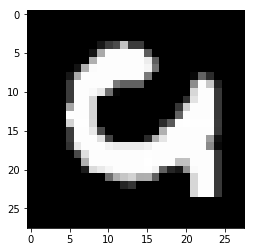

loss: 7.6499536947532745, true: 2, predicted: 7


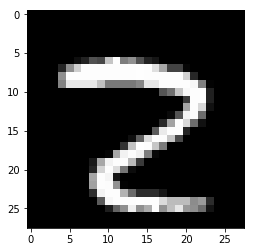

loss: 7.716066975199777, true: 3, predicted: 7


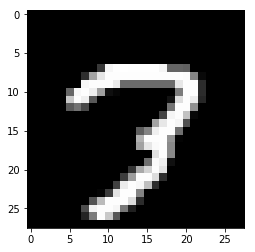

loss: 9.40688901765689, true: 8, predicted: 7


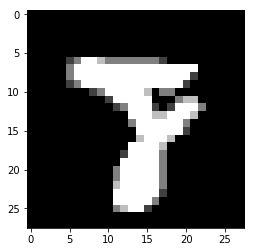

In [5]:
test_losses = net.top_losses(test, test_labels, 10)

Plot results

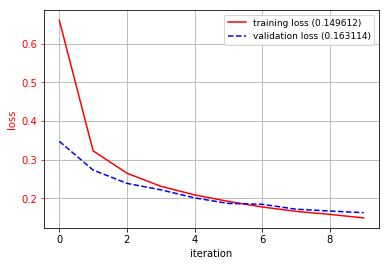

In [18]:
plot_error(errors, val_errors)